In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read data
df_density = pd.read_excel('../../density.xlsx')
df_data = pd.read_csv('../data/coople_data.csv')
df_lat = pd.read_csv('../../post-codes.csv')
df_population = pd.read_excel('../../population.xlsx')

/Users/guan/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
df_population = df_population.iloc[3:,:2]
df_population = df_population.rename(columns={'su-e-01.02.03.07': 'Post Code','Permanent resident population by postal code, category of citizenship, sex, five-year age class and marital status, on 31.12.2022':'Population'})
df_density = df_density.drop(['Population','Density'],axis=1)

In [3]:
df_density = df_density.merge(df_population,on='Post Code',how='left')
df_density['Density'] = df_density['Population']/df_density['Area']
df_density.head()

,Post Code,City,Region,Area,Population,Density
0,1000,Lausanne,Vaud,14.100,4072,288.794326
1,1001,Lausanne,Vaud,NaN,NaN,NaN
2,1002,Lausanne,Vaud,NaN,NaN,NaN
3,1003,Lausanne,Vaud,0.820,6707,8179.268293
4,1004,Lausanne,Vaud,2.272,31230,13745.598592


In [4]:
df_density.to_csv('../../density.csv')

In [5]:
df_urban = df_data.merge(df_density, on = 'Post Code',how = 'left')
df_urban.set_index('Rank', inplace=True)

In [6]:
df_urban = df_urban.drop(['City_y'],axis=1)
df_urban = df_urban.rename(columns={'City_x': 'City'})
df_urban = df_urban.dropna(subset = ['Density'])
df_urban_lat = df_urban.merge(df_lat.drop_duplicates(['Post Code']), on = 'Post Code',how = 'left')
df_urban.head()

,Unnamed: 0,Job role,Experience Level,Experience detail,Job description,Industry,City,Post Code,Pay total,Pay per hour,Start date,Shift,Region,Area,Population,Density
Rank,,,,,,,,,,,,,,,,
1,0,Service Gastronomie,Ungelernt mit >20 Monaten Erfahrung,Personen ohne eidgenössisches Fähigkeitszeugni...,Travail usuel de chef de rang:\n- Mise en plac...,Gastronomie / Hotel,Neuchâtel,2000,227.25,30.30,22 Aug 2023,1,Canton of Neuchâtel,31.600,33200,1050.632911
2,1,Logistiker/in,Ungelernt,Personen mit Bereitschaft zu körperlicher Arbe...,Funktionsumschreibung\n* Der/Die Rangierdienst...,Promotion / Event,Spreitenbach,8957,34444.75,29.00,22 Aug 2023,132,Aargau,8.600,12317,1432.209302
3,2,Verkaufsmitarbeiter/in / Detailhandel,Ungelernt,Verkaufsmitarbeiter/in mit Freude am Verkauf u...,Aufgaben:\n- Auffülltätigkeiten (Non Food Bere...,Detailhandel / Logistik,Rüschlikon,8803,16605.00,27.00,23 Aug 2023,82,Canton of Zürich,4.632,6224,1343.696028
5,4,Logistiker/in,Ungelernt mit >20 Monaten Erfahrung,Der Nachweis über >20 Monate Praxiserfahrung i...,!Die Einsatzzeiten im sind fiktiv!Den genauen ...,Promotion / Event,Willisau,6130,6048.00,27.00,23 Aug 2023,28,Canton of Lucerne,33.400,7543,225.838323
6,5,Handwerk & Auf-/Abbau,Ungelernt,Personen mit Bereitschaft zu körperlicher Arbe...,Anlagenbetreuer Tiefkühl\n\n \n\nAufgaben\n\n-...,Promotion / Event,Schafisheim,5503,42327.25,25.46,23 Aug 2023,190,Aargau,6.300,3037,482.063492


In [7]:
density = df_urban['Density']
print(min(density),np.mean(density),max(density))

11.042345276872965 2636.7902527617684 18213.254943880278


In [8]:
df_urban['Urban'] = df_urban['Density'] > 400

In [9]:
urban_total = df_urban['Urban'].sum()/df_urban['Urban'].count()
urban_total

0.8699918233851186

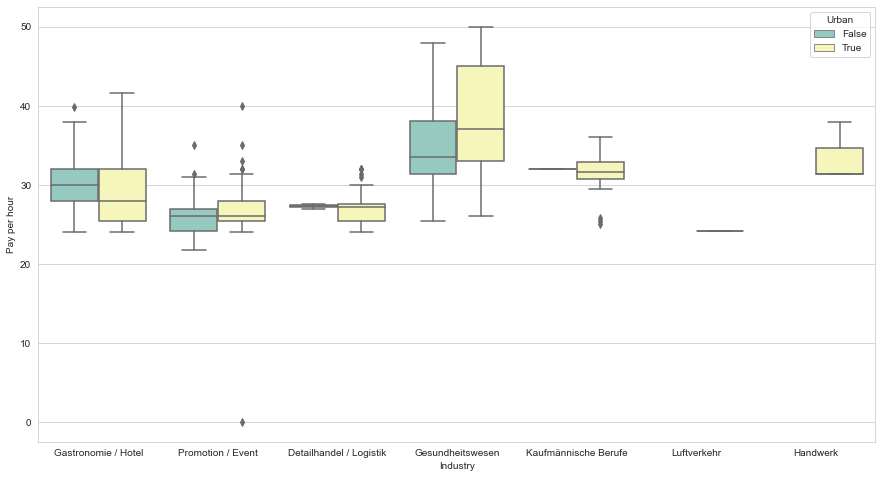

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Industry", y="Pay per hour", hue="Urban", data=df_urban, palette="Set3")

In [11]:
# Urban data group by post code
df_count = df_urban.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,1003,3
1,1006,11
2,1010,1
3,1022,1
4,1024,3
...,...,...
316,9515,2
317,9542,1
318,9555,2
319,9565,2


In [12]:
# Merge grouped aby data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,City,Region,Area,Population,Density,gig_per,urban
0,1003,3,Lausanne,Vaud,0.820,6707,8179.268293,0.044729,urban center
1,1006,11,Lausanne,Vaud,1.553,15391,9910.495815,0.07147,urban center
2,1010,1,Lausanne,Vaud,2.856,15376,5383.753501,0.006504,urban center
3,1022,1,NaN,Vaud,1.662,8737,5256.919374,0.011446,urban center
4,1024,3,Chavannes-près-Renens,Vaud,4.829,13118,2716.504452,0.022869,urban center


In [13]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural            75
urban           130
urban center    121
Name: urban, dtype: int64

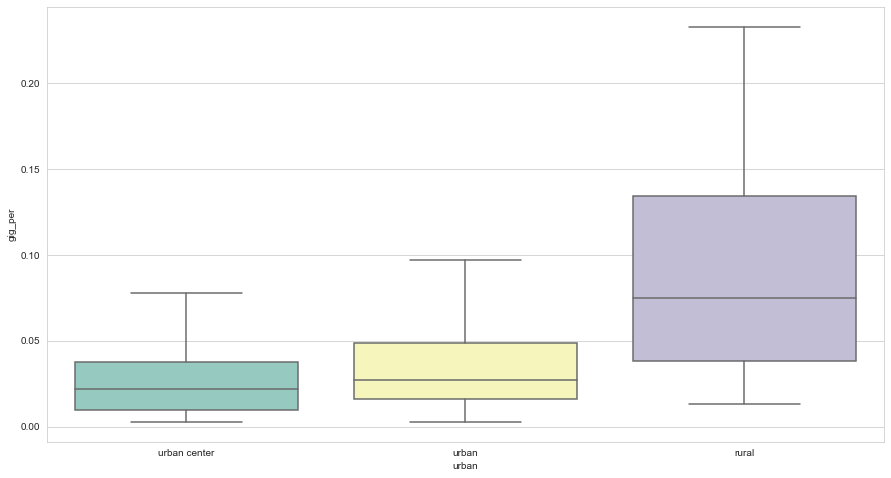

In [14]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3",showfliers = False)

In [15]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']

In [16]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 50)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  
    plt.show()

In [17]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 25, label = labels, range = [0,0.85])
    plt.legend()
    plt.xlabel('percentage of gig workers')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.show()

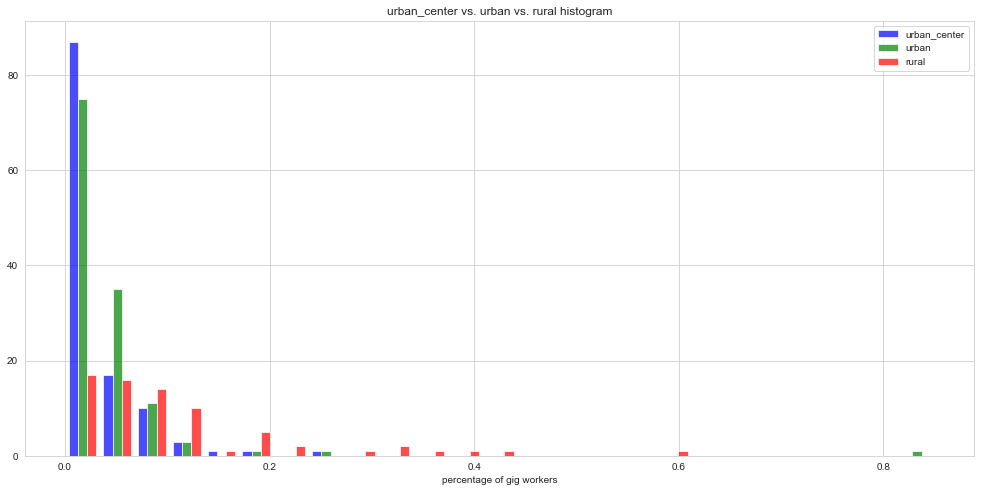

In [18]:
hist_all(['urban_center','urban','rural'],urban_center,urban,rural)

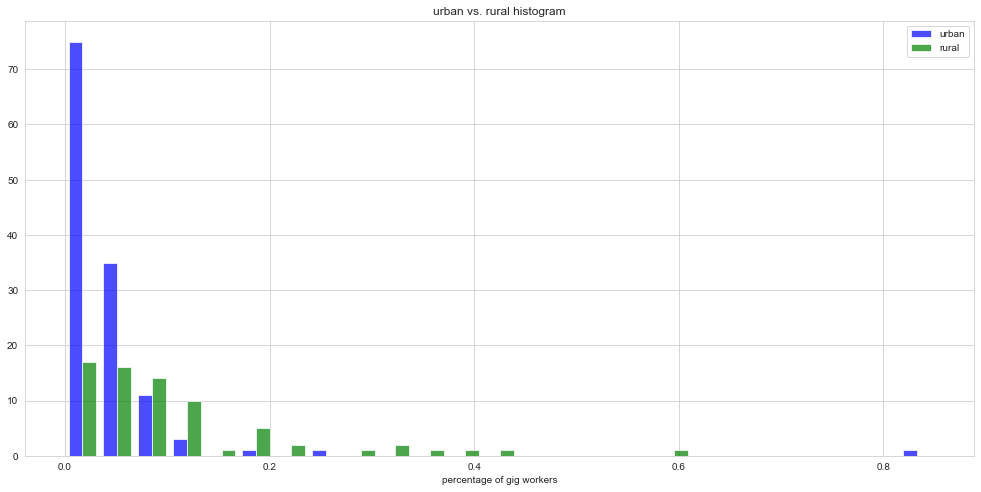

In [19]:
hist_all(['urban','rural'],urban,rural)

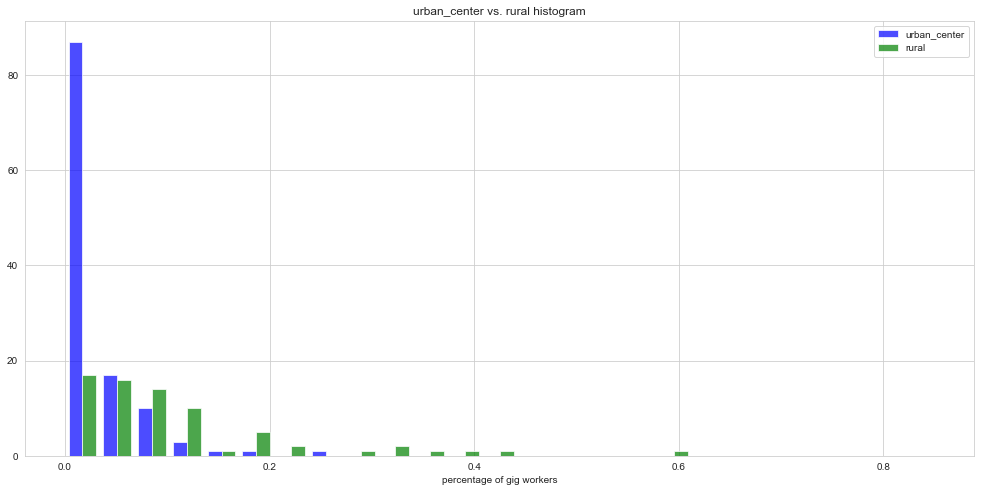

In [20]:
hist_all(['urban_center','rural'],urban_center,rural)

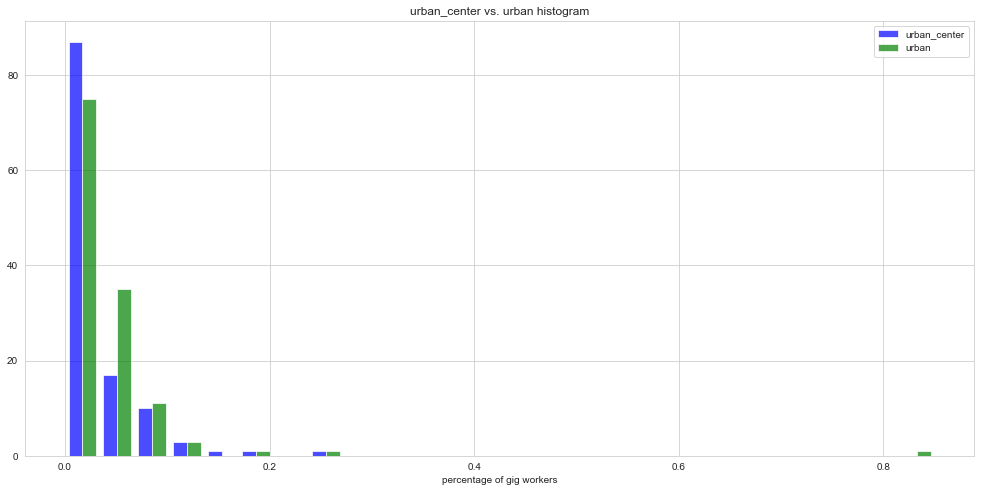

In [21]:
hist_all(['urban_center','urban'],urban_center,urban)

In [22]:
df_count = df_density.merge(df_count,on = 'Post Code', how = 'left')
df_count['Counts'] = df_count['Counts'].fillna(0)
df_count = df_count.drop(['City','Region'],axis=1)
df_count = df_count.dropna(subset = ['Density','Population'])
df_count['gig_per'] = 100*df_count['Counts']/df_count['Population']
df_count = df_count.rename(columns={'Counts': 'gig_num'})
df_count

,Post Code,Area,Population,Density,gig_num,gig_per
0,1000,14.100,4072,288.794326,0.0,0.0
3,1003,0.820,6707,8179.268293,3.0,0.044729
4,1004,2.272,31230,13745.598592,0.0,0.0
5,1005,1.585,12386,7814.511041,0.0,0.0
6,1006,1.553,15391,9910.495815,11.0,0.07147
...,...,...,...,...,...,...
3517,9411,5.100,701,137.45098,0.0,0.0
3519,9426,1.381,931,674.149167,0.0,0.0
3520,9427,6.900,1846,267.536232,0.0,0.0
3521,9428,7.000,1995,285.0,0.0,0.0


In [23]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title(yv+" vs. "+xv)
    ax.set_xlabel(xv)

In [24]:
df.head()

,Post Code,gig_num,City,Region,Area,Population,Density,gig_per,urban
0,1003,3,Lausanne,Vaud,0.820,6707,8179.268293,0.044729,urban center
1,1006,11,Lausanne,Vaud,1.553,15391,9910.495815,0.07147,urban center
2,1010,1,Lausanne,Vaud,2.856,15376,5383.753501,0.006504,urban center
3,1022,1,NaN,Vaud,1.662,8737,5256.919374,0.011446,urban center
4,1024,3,Chavannes-près-Renens,Vaud,4.829,13118,2716.504452,0.022869,urban center


In [25]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(df[col1], df[col2])
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: -0.052461290053653874, p value: 0.34505456241398913
Spearman rho: -0.437704100528073, p value: 1.0876218655769839e-16
kendall tau: -0.305936547315816, p value: 1.7151180975305382e-16


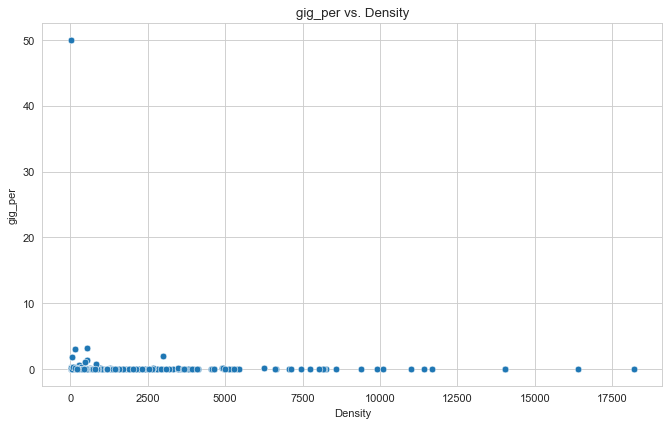

In [26]:
draw_corr(df,'Density','gig_per')

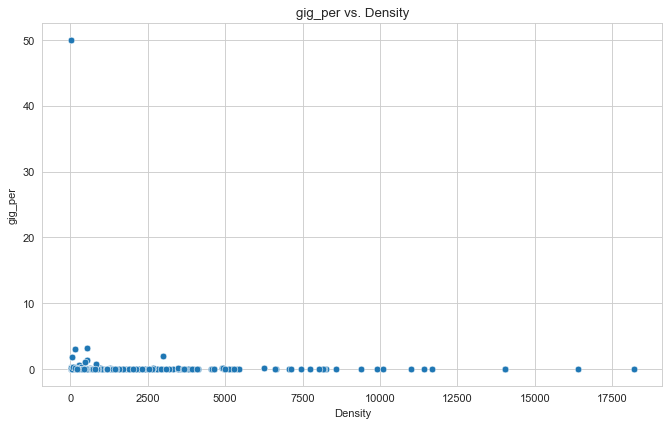

In [29]:
draw_worker_density('Density','gig_per',df)

pearson r: -0.00282752365854796, p value: 0.8733846077237465
Spearman rho: 0.35417953093498983, p value: 1.3522127506567107e-94
kendall tau: 0.2800490601589858, p value: 1.4424667552997621e-87


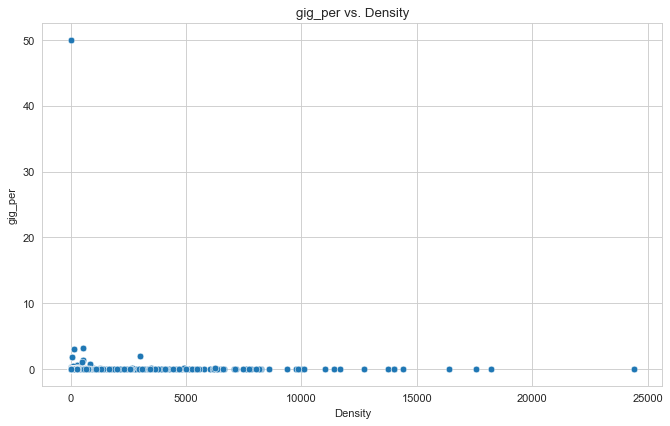

In [28]:
draw_corr(df_count,'Density','gig_per')